In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `scripts/stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.head()

average_heartrate  average_temp  average_watts  \
date                                                                        
2018-01-02 20:47:51+00:00              100.6          21.0           73.8   
2018-01-04 01:36:53+00:00                NaN          24.0          131.7   
2018-01-04 02:56:00+00:00               83.1          25.0           13.8   
2018-01-04 05:37:04+00:00              110.1          24.0          113.6   
2018-01-05 19:22:46+00:00              110.9          20.0          147.7   

                          device_watts  distance  elapsed_time elevation_gain  \
date                                                                            
2018-01-02 20:47:51+00:00        False      15.2            94       316.00 m   
2018-01-04 01:36:53+00:00        False      18.0            52       236.00 m   
2018-01-04 02:56:00+00:00        False       0.0             3         0.00 m   
2018-01-04 05:37:04+00:00        False      22.9            77       246.00 m   
2018-01-05 19:22:46+00:00         True      58.4           189       676.00 m   

                           kudos  moving_time workout_type  
date                                                        
2018-01-02 20:47:51+00:00     10           73         Ride  
2018-01-04 01:36:53+00:00      5           46         Ride  
2018-01-04 02:56:00+00:00      2            2         Ride  
2018-01-04 05:37:04+00:00      8           64         Ride  
2018-01-05 19:22:46+00:00     12          144         Ride

The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

date      time                  filename  \
2018-01-28 06:39:49+11:00  01/28/18  06:39:49  2018_01_28_06_39_49.json   
2018-01-28 07:01:32+11:00  01/28/18  07:01:32  2018_01_28_07_01_32.json   
2018-02-01 08:13:34+11:00  02/01/18  08:13:34  2018_02_01_08_13_34.json   
2018-02-06 08:06:42+11:00  02/06/18  08:06:42  2018_02_06_08_06_42.json   
2018-02-07 17:59:05+11:00  02/07/18  17:59:05  2018_02_07_17_59_05.json   

                           axPower  aPower Relative Intensity  aBikeScore  \
2018-01-28 06:39:49+11:00  202.211                    0.75452     16.6520   
2018-01-28 07:01:32+11:00  226.039                    0.84343     80.2669   
2018-02-01 08:13:34+11:00    0.000                    0.00000      0.0000   
2018-02-06 08:06:42+11:00  221.672                    0.82714     78.8866   
2018-02-07 17:59:05+11:00  218.211                    0.81422    159.4590   

                           Skiba aVI  aPower Response Index  aIsoPower  \
2018-01-28 06:39:49+11:00    1.31920                1.67755    223.621   
2018-01-28 07:01:32+11:00    1.21137                1.54250    246.185   
2018-02-01 08:13:34+11:00    0.00000                0.00000      0.000   
2018-02-06 08:06:42+11:00    1.35775                1.86002    254.409   
2018-02-07 17:59:05+11:00    1.47188                1.74658    233.780   

                               aIF  ...  Rest AVNN  Rest SDNN  Rest rMSSD  \
2018-01-28 06:39:49+11:00  0.83441  ...          0          0           0   
2018-01-28 07:01:32+11:00  0.91860  ...          0          0           0   
2018-02-01 08:13:34+11:00  0.00000  ...          0          0           0   
2018-02-06 08:06:42+11:00  0.94929  ...          0          0           0   
2018-02-07 17:59:05+11:00  0.87231  ...          0          0           0   

                           Rest PNN50  Rest LF  Rest HF  HRV Recovery Points  \
2018-01-28 06:39:49+11:00           0        0        0                    0   
2018-01-28 07:01:32+11:00           0        0        0                    0   
2018-02-01 08:13:34+11:00           0        0        0                    0   
2018-02-06 08:06:42+11:00           0        0        0                    0   
2018-02-07 17:59:05+11:00           0        0        0                    0   

                                NP       IF       TSS  
2018-01-28 06:39:49+11:00  222.856  0.83155   20.2257  
2018-01-28 07:01:32+11:00  245.365  0.91554   94.5787  
2018-02-01 08:13:34+11:00    0.000  0.00000    0.0000  
2018-02-06 08:06:42+11:00  253.702  0.94665   98.3269  
2018-02-07 17:59:05+11:00  232.644  0.86808  171.0780  

[5 rows x 362 columns]

The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [4]:
display(strava.join(cheetah, how='inner' ,on='date'))

average_heartrate  average_temp  average_watts  \
date                                                                        
2018-01-27 19:39:49+00:00              120.6          21.0          153.4   
2018-01-27 20:01:32+00:00              146.9          22.0          187.7   
2018-01-31 21:13:34+00:00              109.8          19.0          143.0   
2018-02-05 21:06:42+00:00              119.3          19.0          165.9   
2018-02-07 06:59:05+00:00              124.8          20.0          151.0   
...                                      ...           ...            ...   
2019-07-19 20:22:49+00:00                NaN           3.0          166.8   
2019-07-26 20:12:56+00:00              120.8           7.0          166.9   
2019-07-27 20:42:59+00:00              122.0           3.0          168.4   
2019-07-27 21:47:24+00:00              144.4           3.0          235.2   
2019-07-27 23:55:13+00:00              109.6          15.0          114.7   

                          device_watts  distance  elapsed_time elevation_gain  \
date                                                                            
2018-01-27 19:39:49+00:00         True       7.6            17        95.00 m   
2018-01-27 20:01:32+00:00         True      38.6            67       449.00 m   
2018-01-31 21:13:34+00:00        False      26.3           649       612.00 m   
2018-02-05 21:06:42+00:00         True      24.3            69       439.00 m   
2018-02-07 06:59:05+00:00         True      47.1           144       890.00 m   
...                                ...       ...           ...            ...   
2019-07-19 20:22:49+00:00         True      58.2           174       666.00 m   
2019-07-26 20:12:56+00:00         True      59.6           185       663.00 m   
2019-07-27 20:42:59+00:00         True      19.8            49       247.00 m   
2019-07-27 21:47:24+00:00         True      29.1            50       415.00 m   
2019-07-27 23:55:13+00:00         True      20.2            68       280.00 m   

                           kudos  moving_time workout_type  ... Rest AVNN  \
date                                                        ...             
2018-01-27 19:39:49+00:00      4           17         Ride  ...         0   
2018-01-27 20:01:32+00:00     19           67         Race  ...         0   
2018-01-31 21:13:34+00:00      6          113         Ride  ...         0   
2018-02-05 21:06:42+00:00      6           65         Ride  ...         0   
2018-02-07 06:59:05+00:00     10          134         Ride  ...         0   
...                          ...          ...          ...  ...       ...   
2019-07-19 20:22:49+00:00     16          136         Ride  ...         0   
2019-07-26 20:12:56+00:00     15          139         Ride  ...         0   
2019-07-27 20:42:59+00:00      6           47         Ride  ...         0   
2019-07-27 21:47:24+00:00     15           50         Race  ...         0   
2019-07-27 23:55:13+00:00      6           59         Ride  ...         0   

                          Rest SDNN Rest rMSSD  Rest PNN50  Rest LF  Rest HF  \
date                                                                           
2018-01-27 19:39:49+00:00         0          0           0        0        0   
2018-01-27 20:01:32+00:00         0          0           0        0        0   
2018-01-31 21:13:34+00:00         0          0           0        0        0   
2018-02-05 21:06:42+00:00         0          0           0        0        0   
2018-02-07 06:59:05+00:00         0          0           0        0        0   
...                             ...        ...         ...      ...      ...   
2019-07-19 20:22:49+00:00         0          0           0        0        0   
2019-07-26 20:12:56+00:00         0          0           0        0        0   
2019-07-27 20:42:59+00:00         0          0           0        0        0   
2019-07-27 21:47:24+00:00         0          0           0        0        0   
2019-07-2

In [8]:
result = strava.join(cheetah, how='inner').dropna()
display(result)

average_heartrate  average_temp  average_watts  \
2018-01-27 19:39:49+00:00              120.6          21.0          153.4   
2018-01-27 20:01:32+00:00              146.9          22.0          187.7   
2018-01-31 21:13:34+00:00              109.8          19.0          143.0   
2018-02-05 21:06:42+00:00              119.3          19.0          165.9   
2018-02-07 06:59:05+00:00              124.8          20.0          151.0   
...                                      ...           ...            ...   
2019-07-12 20:18:22+00:00              117.7           9.0          171.8   
2019-07-26 20:12:56+00:00              120.8           7.0          166.9   
2019-07-27 20:42:59+00:00              122.0           3.0          168.4   
2019-07-27 21:47:24+00:00              144.4           3.0          235.2   
2019-07-27 23:55:13+00:00              109.6          15.0          114.7   

                          device_watts  distance  elapsed_time elevation_gain  \
2018-01-27 19:39:49+00:00         True       7.6            17        95.00 m   
2018-01-27 20:01:32+00:00         True      38.6            67       449.00 m   
2018-01-31 21:13:34+00:00        False      26.3           649       612.00 m   
2018-02-05 21:06:42+00:00         True      24.3            69       439.00 m   
2018-02-07 06:59:05+00:00         True      47.1           144       890.00 m   
...                                ...       ...           ...            ...   
2019-07-12 20:18:22+00:00         True      57.1           201       722.00 m   
2019-07-26 20:12:56+00:00         True      59.6           185       663.00 m   
2019-07-27 20:42:59+00:00         True      19.8            49       247.00 m   
2019-07-27 21:47:24+00:00         True      29.1            50       415.00 m   
2019-07-27 23:55:13+00:00         True      20.2            68       280.00 m   

                           kudos  moving_time workout_type  ... Rest AVNN  \
2018-01-27 19:39:49+00:00      4           17         Ride  ...         0   
2018-01-27 20:01:32+00:00     19           67         Race  ...         0   
2018-01-31 21:13:34+00:00      6          113         Ride  ...         0   
2018-02-05 21:06:42+00:00      6           65         Ride  ...         0   
2018-02-07 06:59:05+00:00     10          134         Ride  ...         0   
...                          ...          ...          ...  ...       ...   
2019-07-12 20:18:22+00:00     13          142         Ride  ...         0   
2019-07-26 20:12:56+00:00     15          139         Ride  ...         0   
2019-07-27 20:42:59+00:00      6           47         Ride  ...         0   
2019-07-27 21:47:24+00:00     15           50         Race  ...         0   
2019-07-27 23:55:13+00:00      6           59         Ride  ...         0   

                          Rest SDNN Rest rMSSD  Rest PNN50  Rest LF  Rest HF  \
2018-01-27 19:39:49+00:00         0          0           0        0        0   
2018-01-27 20:01:32+00:00         0          0           0        0        0   
2018-01-31 21:13:34+00:00         0          0           0        0        0   
2018-02-05 21:06:42+00:00         0          0           0        0        0   
2018-02-07 06:59:05+00:00         0          0           0        0        0   
...                             ...        ...         ...      ...      ...   
2019-07-12 20:18:22+00:00         0          0           0        0        0   
2019-07-26 20:12:56+00:00         0          0           0        0        0   
2019-07-27 20:42:59+00:00         0          0           0        0        0   
2019-07-27 21:47:24+00:00         0          0           0        0        0   
2019-07-27 23:55:13+00:00         0          0           0        0        0   

                           HRV Recovery Points       NP        IF       TSS  
2018-01-27 19:39:49+00:00                    0  222.856  0.831550   20.2257  
2018-01-27 20:01:32+00:00                    0  245.365  0.915540   94.5787  
2018-01-3

## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
    
* Some of the rides are designated as "Race" in the `workout_type` field, these are where I am racing and you might expect that these would be the most challenging rides.  Normalised Power (NP) is a good measure of how hard a ride is.  Explore the values of `NP` for races vs the overall set of rides to see if this hypothesis is supported (use graphs and summary statistics).  Are races more challenging than rides in general? 

* It is useful to see a summary of rides over the year. Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate another summary graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


In [32]:
result_clean.skew(axis=0, skipna=1) 

average_heartrate      0.047026
average_temp          -0.138562
average_watts          0.540200
device_watts           0.000000
distance               0.519870
                         ...   
Rest HF                0.000000
HRV Recovery Points    0.000000
NP                    -2.449900
IF                    -2.449901
TSS                    1.055781
Length: 367, dtype: float64

In [9]:
result_clean = result.drop(result.index[result.device_watts==False])
display (result_clean)

average_heartrate  average_temp  average_watts  \
2018-01-27 19:39:49+00:00              120.6          21.0          153.4   
2018-01-27 20:01:32+00:00              146.9          22.0          187.7   
2018-02-05 21:06:42+00:00              119.3          19.0          165.9   
2018-02-07 06:59:05+00:00              124.8          20.0          151.0   
2018-02-09 19:18:03+00:00              123.0          20.0          145.9   
...                                      ...           ...            ...   
2019-07-12 20:18:22+00:00              117.7           9.0          171.8   
2019-07-26 20:12:56+00:00              120.8           7.0          166.9   
2019-07-27 20:42:59+00:00              122.0           3.0          168.4   
2019-07-27 21:47:24+00:00              144.4           3.0          235.2   
2019-07-27 23:55:13+00:00              109.6          15.0          114.7   

                          device_watts  distance  elapsed_time elevation_gain  \
2018-01-27 19:39:49+00:00         True       7.6            17        95.00 m   
2018-01-27 20:01:32+00:00         True      38.6            67       449.00 m   
2018-02-05 21:06:42+00:00         True      24.3            69       439.00 m   
2018-02-07 06:59:05+00:00         True      47.1           144       890.00 m   
2018-02-09 19:18:03+00:00         True      59.8           193       656.00 m   
...                                ...       ...           ...            ...   
2019-07-12 20:18:22+00:00         True      57.1           201       722.00 m   
2019-07-26 20:12:56+00:00         True      59.6           185       663.00 m   
2019-07-27 20:42:59+00:00         True      19.8            49       247.00 m   
2019-07-27 21:47:24+00:00         True      29.1            50       415.00 m   
2019-07-27 23:55:13+00:00         True      20.2            68       280.00 m   

                           kudos  moving_time workout_type  ... Rest AVNN  \
2018-01-27 19:39:49+00:00      4           17         Ride  ...         0   
2018-01-27 20:01:32+00:00     19           67         Race  ...         0   
2018-02-05 21:06:42+00:00      6           65         Ride  ...         0   
2018-02-07 06:59:05+00:00     10          134         Ride  ...         0   
2018-02-09 19:18:03+00:00     22          139         Ride  ...         0   
...                          ...          ...          ...  ...       ...   
2019-07-12 20:18:22+00:00     13          142         Ride  ...         0   
2019-07-26 20:12:56+00:00     15          139         Ride  ...         0   
2019-07-27 20:42:59+00:00      6           47         Ride  ...         0   
2019-07-27 21:47:24+00:00     15           50         Race  ...         0   
2019-07-27 23:55:13+00:00      6           59         Ride  ...         0   

                          Rest SDNN Rest rMSSD  Rest PNN50  Rest LF  Rest HF  \
2018-01-27 19:39:49+00:00         0          0           0        0        0   
2018-01-27 20:01:32+00:00         0          0           0        0        0   
2018-02-05 21:06:42+00:00         0          0           0        0        0   
2018-02-07 06:59:05+00:00         0          0           0        0        0   
2018-02-09 19:18:03+00:00         0          0           0        0        0   
...                             ...        ...         ...      ...      ...   
2019-07-12 20:18:22+00:00         0          0           0        0        0   
2019-07-26 20:12:56+00:00         0          0           0        0        0   
2019-07-27 20:42:59+00:00         0          0           0        0        0   
2019-07-27 21:47:24+00:00         0          0           0        0        0   
2019-07-27 23:55:13+00:00         0          0           0        0        0   

                           HRV Recovery Points       NP        IF       TSS  
2018-01-27 19:39:49+00:00                    0  222.856  0.831550   20.2257  
2018-01-27 20:01:32+00:00                    0  245.365  0.915540   94.5787  
2018-02-0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002106FF4A508>]],
      dtype=object)

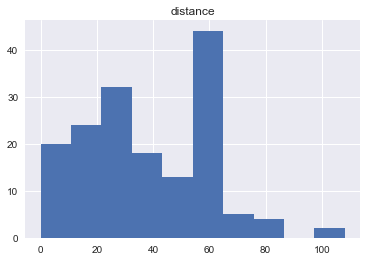

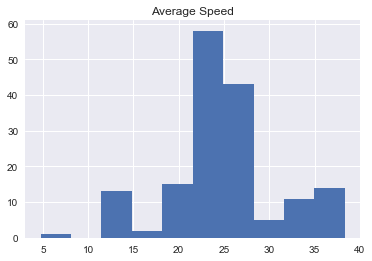

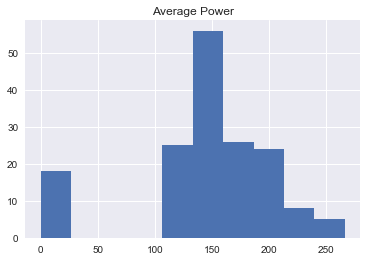

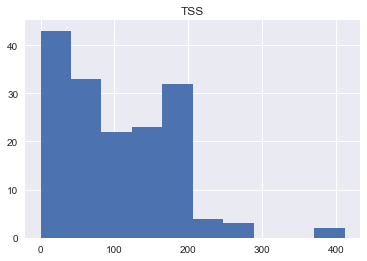

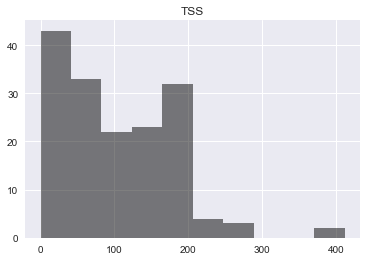

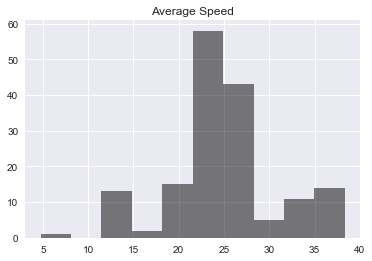

In [26]:
##I have done graphs in scatter plot and histogram
result[['distance']].hist()
result[['Average Speed']].hist()
result[['Average Power']].hist()
result[['TSS']].hist()
result[['TSS']].hist(color='black', alpha=.5)
result[['Average Speed']].hist(color='black', alpha=.5)


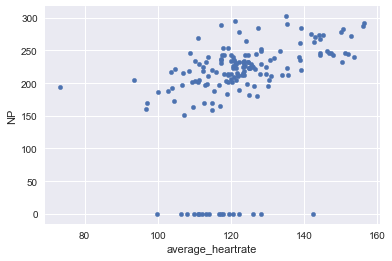

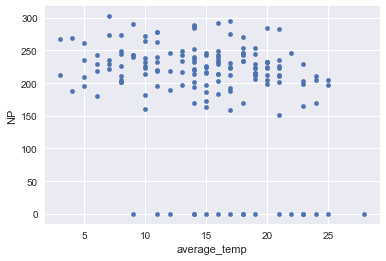

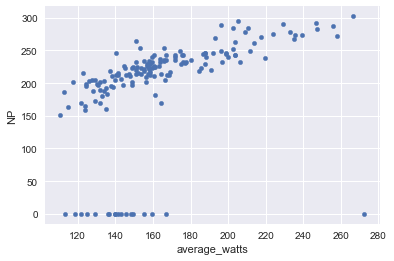

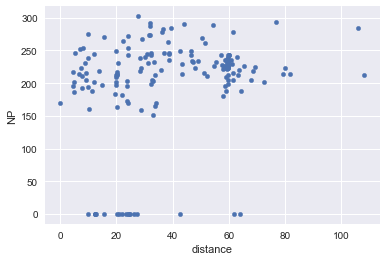

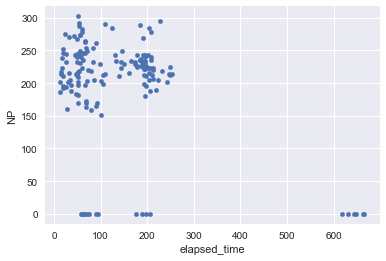

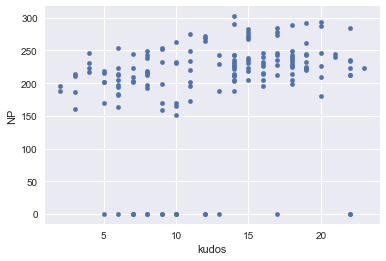

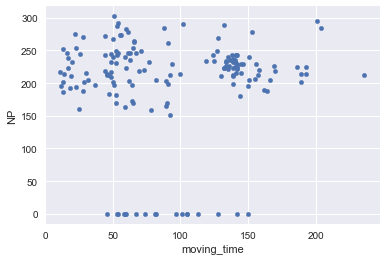

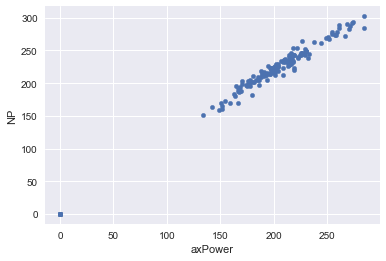

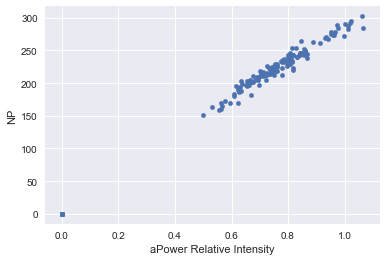

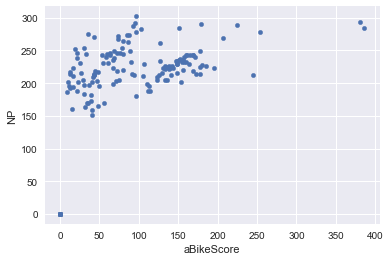

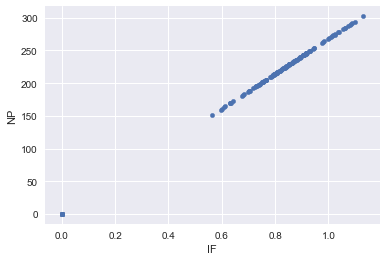

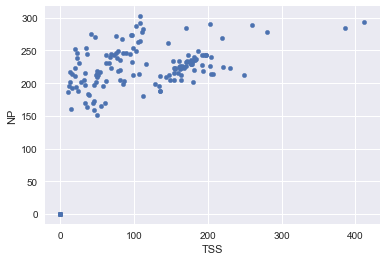

In [25]:


result.plot.scatter('average_heartrate','NP')
result.plot.scatter('average_temp','NP')
result.plot.scatter('average_watts','NP')
result.plot.scatter('distance','NP')
result.plot.scatter('elapsed_time','NP')
result.plot.scatter('kudos','NP')
result.plot.scatter('moving_time','NP')
result.plot.scatter('axPower','NP')
result.plot.scatter('aPower Relative Intensity','NP')
result.plot.scatter('aBikeScore','NP')
result.plot.scatter('IF','NP')
result.plot.scatter('TSS','NP')

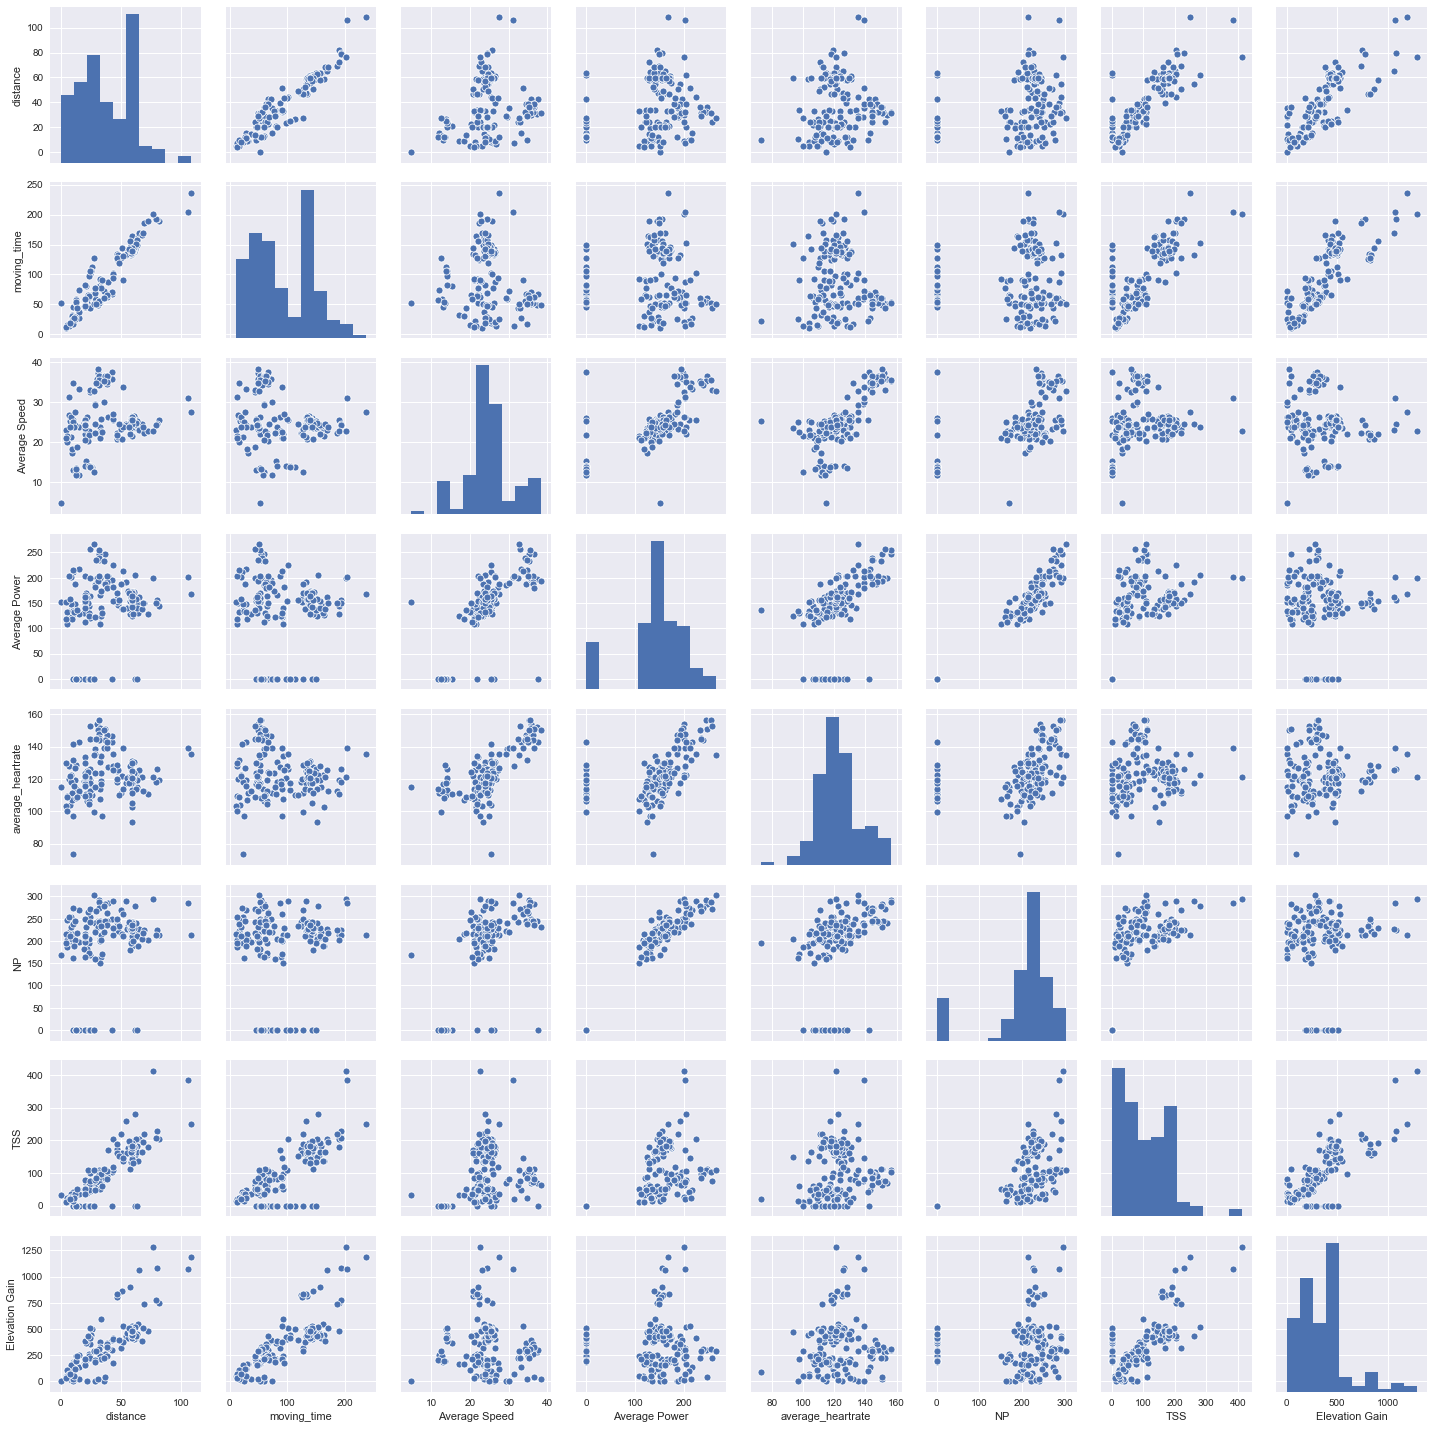

In [12]:
import sys
import seaborn as sns
req= result[["distance","workout_type","moving_time","Average Speed","Average Power","average_heartrate","NP","TSS","Elevation Gain"]]
sns.pairplot(req)

In [13]:
corr = result.corr()
display(corr)

average_heartrate  average_temp  average_watts  distance  \
average_heartrate             1.000000     -0.121186       0.754549  0.102600   
average_temp                 -0.121186      1.000000      -0.285994  0.066297   
average_watts                 0.754549     -0.285994       1.000000  0.053902   
distance                      0.102600      0.066297       0.053902  1.000000   
elapsed_time                 -0.169778      0.170530      -0.185369  0.413011   
...                                ...           ...            ...       ...   
Rest HF                            NaN           NaN            NaN       NaN   
HRV Recovery Points                NaN           NaN            NaN       NaN   
NP                            0.374328     -0.271856       0.467226  0.248879   
IF                            0.374328     -0.271857       0.467226  0.248880   
TSS                           0.123234     -0.057611       0.198325  0.861675   

                     elapsed_time     kudos  moving_time   axPower  \
average_heartrate       -0.169778  0.408551    -0.104515  0.415209   
average_temp             0.170530  0.037716     0.156100 -0.276931   
average_watts           -0.185369  0.358979    -0.148560  0.511100   
distance                 0.413011  0.732082     0.945425  0.246447   
elapsed_time             1.000000  0.226037     0.570267 -0.413202   
...                           ...       ...          ...       ...   
Rest HF                       NaN       NaN          NaN       NaN   
HRV Recovery Points           NaN       NaN          NaN       NaN   
NP                      -0.409593  0.256760     0.047549  0.995883   
IF                      -0.409593  0.256761     0.047550  0.995883   
TSS                      0.221332  0.605371     0.795345  0.561091   

                     aPower Relative Intensity  aBikeScore  ...  Rest AVNN  \
average_heartrate                     0.415208    0.139720  ...        NaN   
average_temp                         -0.276931   -0.057584  ...        NaN   
average_watts                         0.511100    0.218400  ...        NaN   
distance                              0.246448    0.849855  ...        NaN   
elapsed_time                         -0.413202    0.213995  ...        NaN   
...                                        ...         ...  ...        ...   
Rest HF                                    NaN         NaN  ...        NaN   
HRV Recovery Points                        NaN         NaN  ...        NaN   
NP                                    0.995883    0.557179  ...        NaN   
IF                                    0.995883    0.557180  ...        NaN   
TSS                                   0.561091    0.995583  ...        NaN   

                     Rest SDNN  Rest rMSSD  Rest PNN50  Rest LF  Rest HF  \
average_heartrate          NaN         NaN         NaN      NaN      NaN   
average_temp               NaN         NaN         NaN      NaN      NaN   
average_watts              NaN         NaN         NaN      NaN      NaN   
distance                   NaN         NaN         NaN      NaN      NaN   
elapsed_time               NaN         NaN         NaN      NaN      NaN   
...                        ...         ...         ...      ...      ...   
Rest HF                    NaN         NaN         NaN      NaN      NaN   
HRV Recovery Points        NaN         NaN         NaN      NaN      NaN   
NP                         NaN         NaN         NaN      NaN      NaN   
IF                         NaN         NaN         NaN      NaN      NaN   
TSS                        NaN         NaN         NaN      NaN      NaN   

                     HRV Recovery Points        NP        IF       TSS  
average_heartrate                    NaN  0.374328  0.374328  0.123234  
average_temp                         NaN -0.271856 -0.271857 -0.057611  
average_watts                        NaN  0.467226  0.467226  0.198325  
distance                             NaN  0.248879  0.248880  0.8

We can observe the following from the results so far:

NP is highly correlated with average power

average power is  correlated with NP and average_speed

distance is  correlated with moving-time, TSS and Elevation gain

moving_time is correlated with distance, TSS and Elevation gain

average-speed is correlated with average_power ,average_heartrate

average_heartrate is  correlated with average_speed

TSS iscorrelated with distance followed by moving_time and elevation gain

elevation gain is correlated with TSS, moving_time and distance


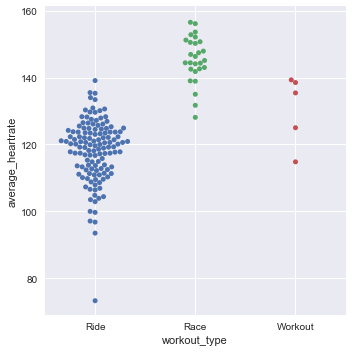

In [55]:

req1= result[["distance","moving_time","Average Speed","Average Power","average_heartrate","workout_type","NP","TSS","Elevation Gain"]]
sns.catplot(x='workout_type',y='average_heartrate',kind='swarm',data=req1)
plt.grid(True)

In [27]:
d= pd.DataFrame()

In [29]:
d["date"]=result.date
d["distance"]=result.distance
d["TSS"]=result.TSS
d["Average Speed"]=result["Average Speed"]
d.sample(5)

date  distance       TSS  Average Speed
2018-11-03 19:45:22+00:00  11/04/18      19.7   37.6067        24.7670
2019-02-16 21:56:32+00:00  02/17/19      33.9   56.0279        22.8209
2019-04-17 21:11:29+00:00  04/18/19       5.3   23.4430        20.0736
2019-05-10 20:19:22+00:00  05/11/19      59.6  192.1920        25.6877
2018-02-09 19:18:03+00:00  02/10/18      59.8  147.7970        25.6585

brown=TSS, black=Distance, orange=Average speed


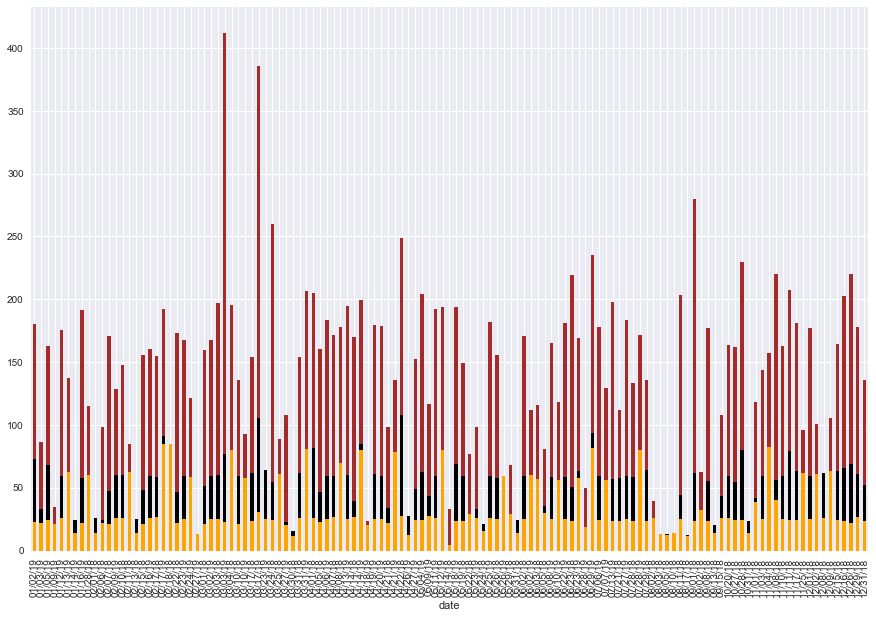

In [36]:
plt.figure(figsize=(15,10))
a=d.groupby('date')['TSS'].sum().plot.bar(color='brown')
b=d.groupby('date')['distance'].sum().plot.bar(color='black')
a=d.groupby('date')['Average Speed'].sum().plot.bar(color='orange')
print('brown=TSS, black=Distance, orange=Average speed')

In [38]:
#challenges

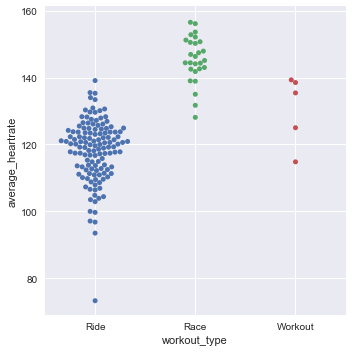

In [57]:
challenge1= result[["distance","moving_time","kudos","Average Speed","Average Power","average_heartrate","workout_type","NP","TSS","Elevation Gain"]]
sns.catplot(x='workout_type',y='average_heartrate',kind='swarm',data=challenge1)
plt.grid(True)

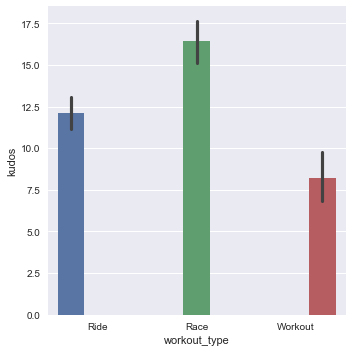

In [45]:
challenge2= result[["workout_type","kudos","distance","moving_time"]]
sns.catplot(x="workout_type", y="kudos",hue="workout_type",kind="bar",data=challenge2)

In [49]:
challenge3= result[["distance","moving_time","Average Speed","kudos","Average Power","average_heartrate","workout_type","NP","TSS","Elevation Gain"]]
cor2=challenge1.corr()
cor2

distance  moving_time     kudos  Average Speed  \
distance           1.000000     0.945425  0.732082       0.191482   
moving_time        0.945425     1.000000  0.603441      -0.112505   
kudos              0.732082     0.603441  1.000000       0.453847   
Average Speed      0.191482    -0.112505  0.453847       1.000000   
Average Power      0.172530    -0.052046  0.269261       0.718527   
average_heartrate  0.102600    -0.104515  0.408551       0.705752   
NP                 0.248879     0.047549  0.256760       0.612939   
TSS                0.861675     0.795345  0.605371       0.206745   
Elevation Gain     0.792785     0.834129  0.516605      -0.069893   

                   Average Power  average_heartrate        NP       TSS  \
distance                0.172530           0.102600  0.248879  0.861675   
moving_time            -0.052046          -0.104515  0.047549  0.795345   
kudos                   0.269261           0.408551  0.256760  0.605371   
Average Speed           0.718527           0.705752  0.612939  0.206745   
Average Power           1.000000           0.524327  0.956020  0.461002   
average_heartrate       0.524327           1.000000  0.374328  0.123234   
NP                      0.956020           0.374328  1.000000  0.563965   
TSS                     0.461002           0.123234  0.563965  1.000000   
Elevation Gain          0.006757           0.042530  0.104396  0.749587   

                   Elevation Gain  
distance                 0.792785  
moving_time              0.834129  
kudos                    0.516605  
Average Speed           -0.069893  
Average Power            0.006757  
average_heartrate        0.042530  
NP                       0.104396  
TSS                      0.749587  
Elevation Gain           1.000000

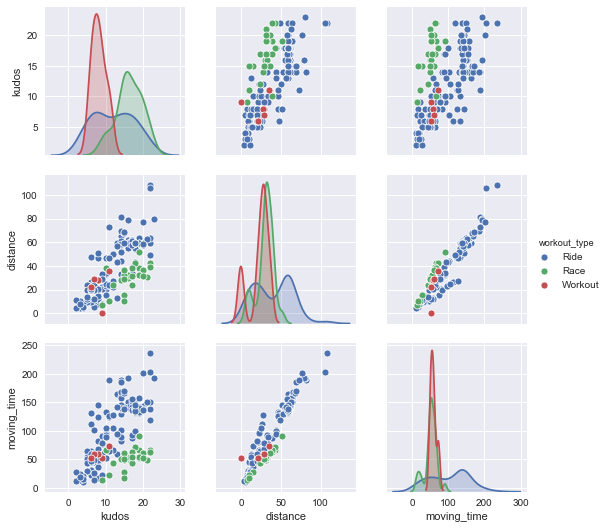

In [58]:
sns.pairplot(challenge2, hue="workout_type")

In [60]:
corr3=challenge2.corr()
corr3

kudos  distance  moving_time
kudos        1.000000  0.732082     0.603441
distance     0.732082  1.000000     0.945425
moving_time  0.603441  0.945425     1.000000

In [61]:
#challenge 2

In [63]:
d= pd.DataFrame()
d["date"]=result.date
d["distance"]=result.distance
d["TSS"]=result.TSS
d["Average Speed"]=result["Average Speed"]
d.sample(5)

date  distance      TSS  Average Speed
2018-11-30 19:15:31+00:00  12/01/18      59.6  177.203        24.9004
2019-07-12 20:18:22+00:00  07/13/19      57.1  198.088        23.7868
2018-08-31 20:10:31+00:00  09/01/18      61.6  279.710        23.8814
2018-07-20 20:25:51+00:00  07/21/18      57.8  112.088        23.5440
2018-08-16 22:08:54+00:00  08/17/18      12.3    0.000        11.8110

In [66]:
from datetime import datetime
from datetime import timedelta
d['date'] = pd.to_datetime(d['date'])
d.head()

date  distance       TSS  Average Speed
2018-01-27 19:39:49+00:00 2018-01-28       7.6   20.2257        26.0234
2018-01-27 20:01:32+00:00 2018-01-28      38.6   94.5787        34.4380
2018-01-31 21:13:34+00:00 2018-02-01      26.3    0.0000        13.6882
2018-02-05 21:06:42+00:00 2018-02-06      24.3   98.3269        22.2417
2018-02-07 06:59:05+00:00 2018-02-07      47.1  171.0780        20.7841

In [69]:
d1= d.reset_index(drop=True)
d1.head()

date  distance       TSS  Average Speed
0 2018-01-28       7.6   20.2257        26.0234
1 2018-01-28      38.6   94.5787        34.4380
2 2018-02-01      26.3    0.0000        13.6882
3 2018-02-06      24.3   98.3269        22.2417
4 2018-02-07      47.1  171.0780        20.7841

In [72]:
Distance_Month = d1.set_index('date').groupby(pd.Grouper(freq='M'))['distance','TSS'].sum()
Distance_Month["Average_Speed"] = d1.set_index('date').groupby(pd.Grouper(freq='M'))['Average Speed'].mean()
Distance_Month = Distance_Month.reset_index()
Distance_Month

date  distance        TSS  Average_Speed
0  2018-01-31      46.2   114.8044      30.230700
1  2018-02-28     459.0  1035.4683      24.150715
2  2018-03-31     472.0  1345.6372      24.575292
3  2018-04-30     423.6  1232.1499      24.411667
4  2018-05-31     220.1   483.5867      20.261557
5  2018-06-30     193.4   586.4858      27.037100
6  2018-07-31     180.7   381.4320      23.512267
7  2018-08-31     113.5   242.4241      17.115683
8  2018-09-30     204.9   627.2077      23.970480
9  2018-10-31     217.6   554.9470      22.134775
10 2018-11-30     480.6  1287.1279      24.732308
11 2018-12-31     522.0  1284.0405      26.789527
12 2019-01-31     369.2   968.9845      23.914789
13 2019-02-28     319.2   771.0890      25.960578
14 2019-03-31     447.7  1371.9961      26.294820
15 2019-04-30     468.1  1247.4662      24.362577
16 2019-05-31     423.4  1218.9468      26.653991
17 2019-06-30     366.8  1030.8365      27.107017
18 2019-07-31     280.8   859.7362      26.245400

Text(0.5, 1.0, 'Distance Travelled by month')

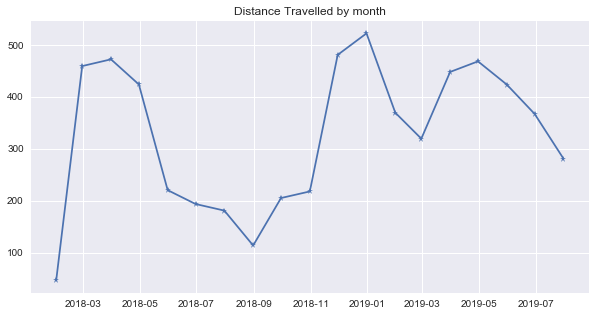

In [74]:
plt.figure(figsize = (10,5))
plt.plot(Distance_Month["date"], Distance_Month["distance"], marker = '*')
plt.title("Distance Travelled by month")

In [75]:
#portfolio 1 done